In [1]:
import pandas as pd
dados = pd.read_csv('dados_unidade_3.csv')
dados.columns = [x.lower() for x in dados.columns]
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
escalonar = dados.iloc[:,:10]
escalonar = pd.DataFrame(scaler.fit_transform(escalonar),columns=escalonar.columns)
escalonar['nox'] = dados['nox'].values
x = escalonar.iloc[:,:10].values
y = escalonar.iloc[:,10].values
from sklearn.model_selection import train_test_split, cross_val_score
x_treino,x_teste,y_treino,y_teste = train_test_split(x,y,train_size=0.8,random_state=3)

# Métodos Ensemble

Os métodos ensemble, ou métodos de conjunto, são técnicas que combinam as previsões de vários modelos base (por exemplo, vários árvores de decisão) para melhorar a robustez e a precisão do modelo. Existem diferentes métodos ensemble para regressão, e aqui estão alguns dos mais comuns:

## Bagging

Esse método consiste em ajustar vários modelos base (tipicamente árvores de decisão) em diferentes subconjuntos dos dados, que são amostrados com reposição. As previsões finais são obtidas calculando a média das previsões de todos os modelos base.

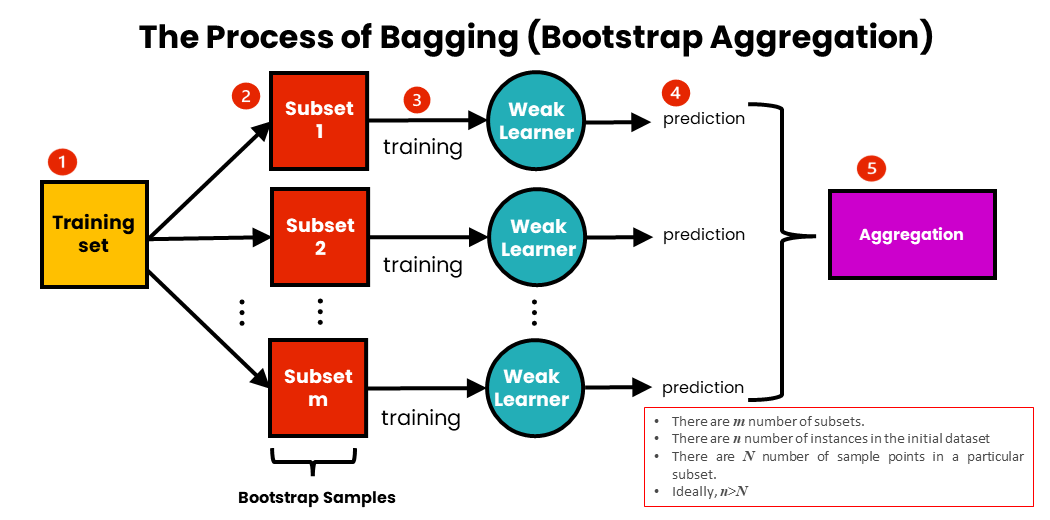

In [2]:
from sklearn.ensemble import BaggingRegressor
from sklearn.neighbors import KNeighborsRegressor

In [3]:
modelo = KNeighborsRegressor(n_neighbors=3, p = 1, weights='distance' )
bagging = BaggingRegressor(base_estimator=modelo, n_estimators=50, random_state=42,verbose=3)
bagging.fit(x_treino,y_treino)
y_prev = bagging.predict(x_teste)


d:\Drive Unesc\Meu Drive\2023-2\5af - Ciência de Dados\Notebooks\Unidade 4\venv2\lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Building estimator 1 of 50 for this parallel run (total 50)...
Building estimator 2 of 50 for this parallel run (total 50)...
Building estimator 3 of 50 for this parallel run (total 50)...
Building estimator 4 of 50 for this parallel run (total 50)...
Building estimator 5 of 50 for this parallel run (total 50)...
Building estimator 6 of 50 for this parallel run (total 50)...
Building estimator 7 of 50 for this parallel run (total 50)...
Building estimator 8 of 50 for this parallel run (total 50)...
Building estimator 9 of 50 for this parallel run (total 50)...
Building estimator 10 of 50 for this parallel run (total 50)...
Building estimator 11 of 50 for this parallel run (total 50)...
Building estimator 12 of 50 for this parallel run (total 50)...
Building estimator 13 of 50 for this parallel run (total 50)...
Building estimator 14 of 50 for this parallel run (total 50)...
Building estimator 15 of 50 for this parallel run (total 50)...
Building estimator 16 of 50 for this parallel run

In [4]:
from sklearn.metrics import mean_absolute_percentage_error,r2_score
mape = mean_absolute_percentage_error(y_teste,y_prev),
r2 = r2_score(y_teste,y_prev)
print(f'MAPE = {mape}, R2 = {r2}')

MAPE = (0.03420681093428019,), R2 = 0.8879695485845324


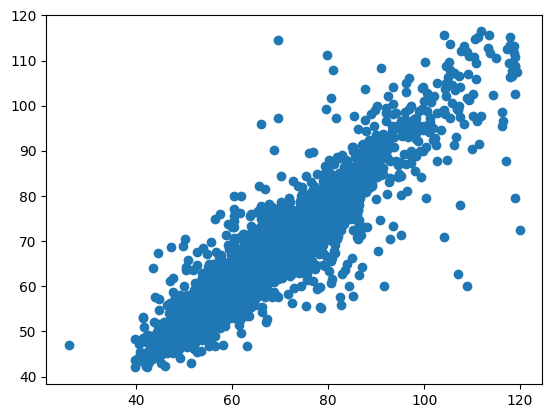

In [5]:
import matplotlib.pyplot as plt
plt.scatter(y_teste,y_prev)

## Boosting

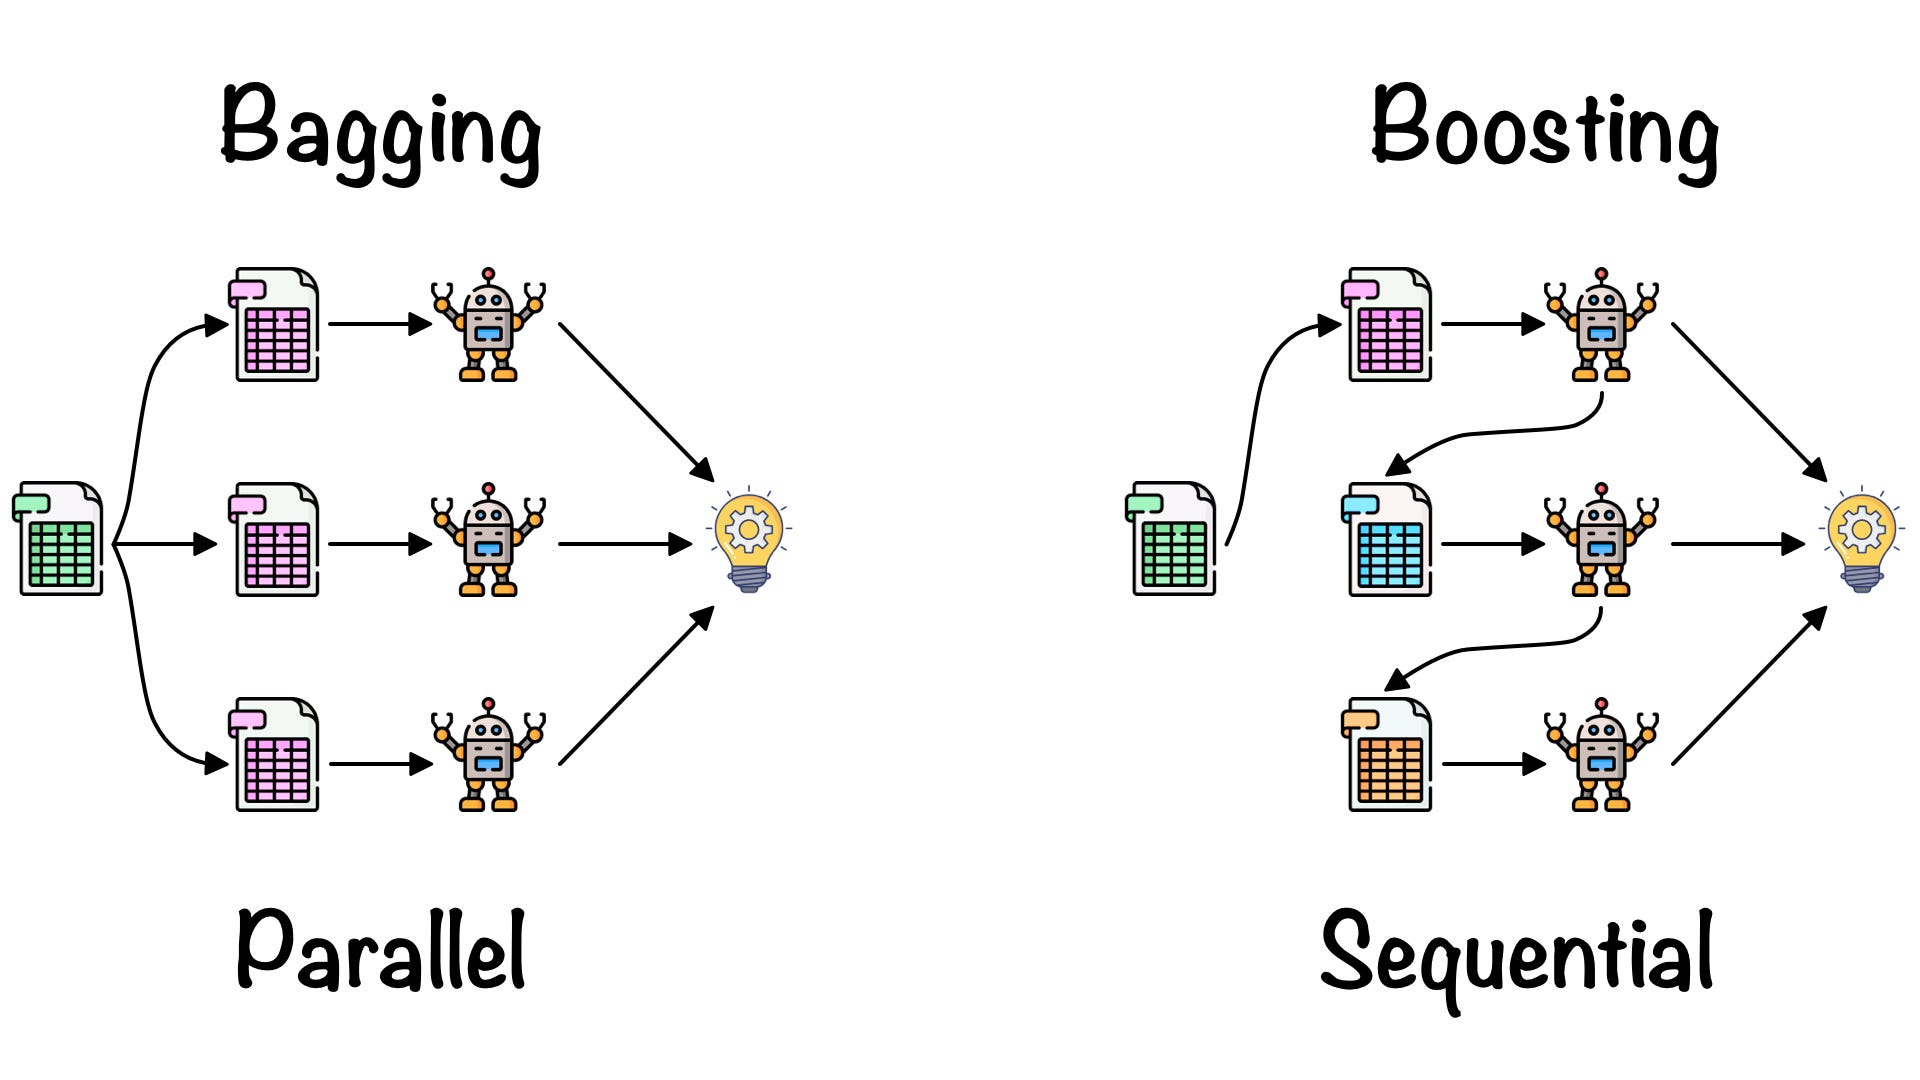

### Gradient Boosting Regressor

Este método ajusta modelos sequencialmente, onde cada modelo tenta corrigir os erros do modelo anterior. Usa o gradiente da função de perda para melhorar a previsão.

### AdaBoost Regressor

Semelhante ao Gradient Boosting, mas ajusta os pesos das observações com base nos erros das previsões anteriores.


In [6]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor


In [7]:
modelo = DecisionTreeRegressor()
ada = AdaBoostRegressor(base_estimator=modelo, n_estimators=50, learning_rate=1.0, random_state=42)
ada.fit(x_treino,y_treino)
y_prev = ada.predict(x_teste)

d:\Drive Unesc\Meu Drive\2023-2\5af - Ciência de Dados\Notebooks\Unidade 4\venv2\lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


In [8]:
mape = mean_absolute_percentage_error(y_teste,y_prev),
r2 = r2_score(y_teste,y_prev)
print(f'MAPE = {mape}, R2 = {r2}')

MAPE = (0.03208926680734882,), R2 = 0.9050399389758236


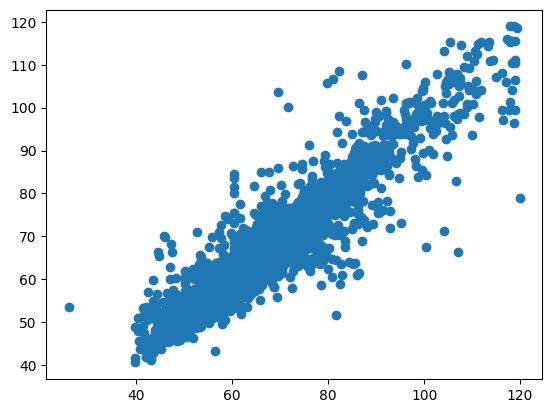

In [9]:
import matplotlib.pyplot as plt
plt.scatter(y_teste,y_prev)

## Stacking

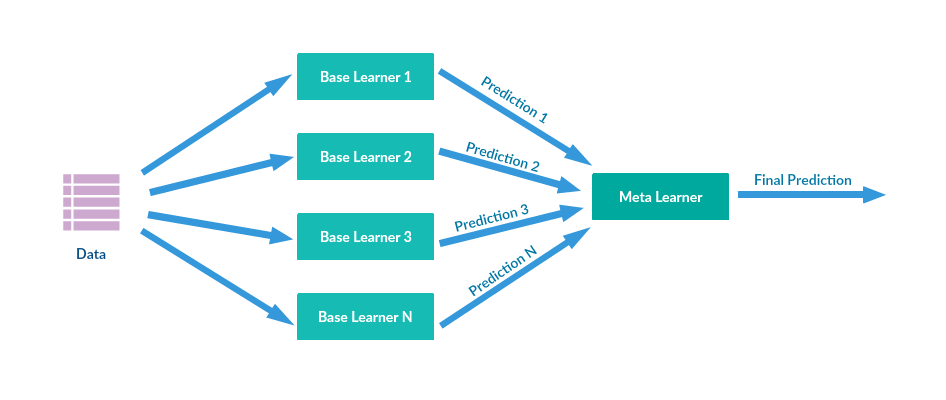

### Stacked Regressor

Consiste em empilhar a saída de modelos individuais e usar outro modelo para finalizar a previsão. Pode ser utilizado para combinar diferentes tipos de regressores.


In [10]:
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import LinearRegression

In [11]:
estimators = [
    ('knn', KNeighborsRegressor(n_neighbors=3, p = 1, weights='distance')),
    ('dtr', DecisionTreeRegressor())
]
stack_reg = StackingRegressor(estimators=estimators, final_estimator=LinearRegression())
stack_reg.fit(x_treino,y_treino)
y_prev = stack_reg.predict(x_teste)

In [12]:
mape = mean_absolute_percentage_error(y_teste,y_prev),
r2 = r2_score(y_teste,y_prev)
print(f'MAPE = {mape}, R2 = {r2}')

MAPE = (0.03425740332084432,), R2 = 0.8930006704913296


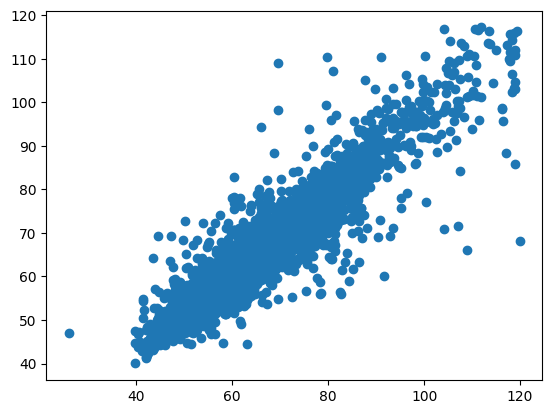

In [13]:
import matplotlib.pyplot as plt
plt.scatter(y_teste,y_prev)